<h1 style="text-align:center">
    Employee Salaries for different job roles
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Alejandro Borrego Megías
</h3>
    
<h3 style="text-align:center">
    19/10/2023
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre los sueldos que ganan distintos empleados según sus cometidos y experiencia, a lo largo de distintos negocios y zonas del mundo.
La URL de referencia es la siguiente:

https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna. Seguidamente, te toca a ti hacer una breve introducción, completando el fragmento de letra en azul y desarrollándolo a tu antojo.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido ... pero no he podido ...

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de *** sobre 10.
</font>

<br>

<font color="green">
Completa tus datos personales en la cabecera, bajo el rótulo inicial. Completa también el breve apartado anterior. Elimina este párrafo en verde. A partir de ahora, pon en azul los comentarios tuyos, dejando en negro los míos, del enunciado, y suprimiendo los fragmentos en verde, como éste, que son indicaciones pero que, una vez atendidas, deben suprimirse.
</font>

# Librerías

<br>

<font color="darkblue">
Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.    
</font>

In [1]:
# Esta celda debe ser completada por el estudiante.
from typing import List, Dict, Tuple, Optional
import csv # used in exercise a.1
import pandas as pd # used in exercise a.3

from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## a) Algunas operaciones sencillas [3 puntos]

Nuestra tabla de datos es un archivo de texto (`ds_salaries.csv`) que puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/txt_con_comas.png" width="600">
</center>

La primera columna es la cabecera, y contiene los nombres de los campos, separados por comas.
Las demás, son los valores de dichos campos, consignando los datos de cada vehículo en una línea.

Si la abrimos con *excell*, vemos cada línea en una celda, sin separar los distintos campos:

<br>

<center>
    <img src="./images/excell_con_comas.png" width="600">
</center>

## a.1) Cambiar el formato del archivo `csv` a "punto y coma"

Podemos importar la tabla de datos desde excell (pestaña `datos`), simplemente indicando que el separador es una coma:

<br>

<center>
    <img src="./images/excell_con_puntos_y_comas.png" width="600">
</center>

Pero te propongo generar un archivo como el anterior, pero que use el punto y coma como separador, en vez de la coma:

<br>

<center>
    <img src="./images/txt_con_puntos_y_comas.png" width="600">
</center>

Para ello, debes diseñar una función que tome con un archivo como el de partida que usa la coma como separador, y genere otro, con el punto y coma como separador.

In [2]:
# Esta celda debe ser completada por el estudiante.
def to_semicolon (input_file_path : str, output_file_path: str):
    """
    Replace all commas with semicolons in the content of a CSV file and write the modified content to another file.

    Parameters
    ----------
    input_file_path, output_file_path: str
    """
    try:
        with open(input_file_path, 'r', newline='') as csvfile_input:
            csv_content = csvfile_input.read()
            csv_to_pc_content = csv_content.replace(',', ';')
    except FileNotFoundError:
        print(f"File not found: {input_file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    try:
        with open(output_file_path, 'w') as csvfile_output:
            csvfile_output.write(csv_to_pc_content)
    except FileNotFoundError:
        print(f"File not found: {input_file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")



In [3]:
# Ejecución de la función anterior:

DatosComas = "ds_salaries.csv"
DatosPunComas = "ds_salaries_pc.csv"
to_semicolon(DatosComas, DatosPunComas)

In [4]:
# Comprobamos que funciona como es debido, viendo las primeras cinco filas de ambos archivos:

with open(DatosComas, "r") as f:
    for _ in range(5):
        linea = f.readline()
        print(linea)

print("....................................") 

with open(DatosPunComas, "r") as f:
    for _ in range(5):
        linea = f.readline()
        print(linea)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size

0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L

1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S

2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M

3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S

....................................
;work_year;experience_level;employment_type;job_title;salary;salary_currency;salary_in_usd;employee_residence;remote_ratio;company_location;company_size

0;2020;MI;FT;Data Scientist;70000;EUR;79833;DE;0;DE;L

1;2020;SE;FT;Machine Learning Scientist;260000;USD;260000;JP;0;JP;S

2;2020;SE;FT;Big Data Engineer;85000;GBP;109024;GB;50;GB;M

3;2020;MI;FT;Product Data Analyst;20000;USD;20000;HN;0;HN;S



**Nota.** En la comprobación anterior, por cada línea que se imprime con la instrucción `print`, se realizan dos saltos de  línea. Eso es porque las líneas anteriores se han cargado con la marca `\n`, como puedes ver a continuación, con la última línea. En las funciones que siguen deberás tener esto en cuenta para suprimir la marca `\n` cuando sea necesario. 

In [5]:
#Observa la marca "\n" al final de la última línea leída:

linea

'3;2020;MI;FT;Product Data Analyst;20000;USD;20000;HN;0;HN;S\n'

## a.2) Selección de una línea, separando sus campos

Diseña ahora una función que selecciona una línea y nos da una lista con los valores de sus campos. Los ejemplares de funcionamiento te darán la información sobre cómo deseamos que funcione:

In [6]:
# Esta celda debe ser completada por el estudiante
def select_line(input_file_path: str, line_number: int) -> List[str]:
    """
    Given a file path returns a specific line

    Parameters
    ----------
    input_file_path: str
    line_number: int

    Returns
    -------
    list(str)
        Returns the line in file input_file_path in the position line_number
    """
    try:
        with open(input_file_path, 'r', newline='') as csvfile_input:
            csv_content = csvfile_input.readlines()
            return csv_content[line_number].strip().split(";")
    except FileNotFoundError:
        print(f"File not found: {input_file_path}")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

In [7]:
# Comprobación del funcionamiento:

cabecera = select_line(DatosPunComas, 0)
print(cabecera)

linea_1 = select_line(DatosPunComas, 1)
print(linea_1)

['', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
['0', '2020', 'MI', 'FT', 'Data Scientist', '70000', 'EUR', '79833', 'DE', '0', 'DE', 'L']


**Nota:** Observa que se suprime la marca de fin de línea, `\n`.

## a.3) Ajustes en nuestro archivo de datos

En el archivo de datos, podemos prescindir de la primera fila, que es la cabecera, y de la primera columna, pues únicamente da un número de orden de las filas, de manera que vamos a suprimir ambas, la primera fila y la primera columna; también, la columna de la experiencia será más manejable si convertimos los código en números (así: "EN" -> 0, "MI" -> 1, "EX" -> 2, "SE" -> 3) y algo parecido haremos con el tamaño de las compañías ("S" -> 1, "EX: 0, "M" -> 2, "L" -> 2). Finalmente, para nuestros fines, preferimos manejar el salario en una moneda común, de manera que descartamos las columnas relativas al sueldo en las monedas de cada país y retenemos únicamente la que refleja el salario en dólares.

Realiza estos cambios y, con ellos, genera el archivo nuevo: `DatosSalariosNormalizados.csv`.

In [8]:
# Esta celda debe ser completada por el estudiante

def normalize_data(input_file_path: str, output_file_path: str):
    """
    Reads a CSV file, normalizes its data, and writes the result to a new CSV file.

    This function performs the following data normalization steps:
    1. Reads the CSV file specified by input_file_path.
    2. Maps the 'experience_level' and 'company_size' values using predefined dictionaries.
    3. Removes the 'salary' and 'salary_currency' columns from the data.
    4. Writes the resulting data to a new CSV file specified by output_file_path.

    Parameters
    ----------
    input_file_path : str
        The path to the input CSV file.

    output_file_path : str
        The path to the output CSV file where the normalized data will be saved.
    """
    try:
        # Define mapping dictionaries
        experience_mapping = {"EN": 0, "MI": 1, "EX": 2, "SE": 3}
        company_size_mapping = {"S": 1, "EX": 0, "M": 2, "L": 3}

        with open(input_file_path, 'r', newline='') as infile, open(output_file_path, 'w', newline='') as outfile:
            reader = infile.readlines()
            writer = csv.writer(outfile, delimiter=';')
            first_line = True
            experience_level_index = 0
            company_size_index = 0
            salary_index = 0
            salary_currency_index = 0
            for line in reader:
                row = line.strip().split(',')
                if first_line:
                    # Get special indices
                    experience_level_index = row.index('experience_level')
                    company_size_index = row.index('company_size')
                    salary_index = row.index('salary')
                    salary_currency_index = row.index('salary_currency')
                    first_line = False
                else:
                    # Extract the experience level and company size columns
                    experience_level = row[experience_level_index]
                    company_size = row[company_size_index]

                    # Normalize experience level and company size
                    experience_level = str(experience_mapping.get(experience_level, experience_level))
                    company_size = str(company_size_mapping.get(company_size, company_size))

                    # Remove salary and salary_currency columns
                    normalized_row = []
                    for index in range(len(row)):
                        if index == experience_level_index:
                            normalized_row.append(experience_level)
                        elif index == company_size_index:
                            normalized_row.append(company_size)
                        elif index == 0 or index == salary_index or index == salary_currency_index:
                            # we skip this values
                            continue
                        else:
                            normalized_row.append(row[index])

                    # Write the normalized row to the output file
                    writer.writerow(normalized_row)
    except FileNotFoundError:
        print(f"File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [9]:
# Comprobación de funcionamiento:

DatosSalariosNormalizados = "ds_salaries.norm.csv"
normalize_data(DatosComas, DatosSalariosNormalizados)

# b) extracción de algunos datos globales directamente de los archivos

## b.1) Relación de puestos y su frecuencia

Con el archivo de datos normalizado, deseamos conocer la relación de los cargos que aparecen en el archivo, así como su frecuencia.

In [10]:
def puesto_frec(input_file_path: str) -> dict:
    """
    Reads a CSV file and calculates the frequencies of job positions.

    This function reads the specified CSV file and counts the frequencies of job positions.
    
    Parameters
    ----------
    input_file_path : str
        The path to the input CSV file.

    Returns
    -------
    dict
        A dictionary containing the job positions (puestos) as keys and their frequencies as values.
    """
    # Initialize a dictionary to store job frequencies
    frequencies = {}
    
    try:
        with open(input_file_path, 'r', newline='') as infile:
            reader = infile.readlines()
            for line in reader:
                row = line.strip().split(';')
                job_position = row[3]  # Assuming the job position is in the 4th column (index 3)
                
                # Count the frequency of each job position
                if job_position in frequencies:
                    frequencies[job_position] += 1
                else:
                    frequencies[job_position] = 1

        return frequencies
    except FileNotFoundError:
        print(f"File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


In [11]:
# Comprobación de funcionamiento:

puesto_y_frec = puesto_frec(DatosSalariosNormalizados)
puesto_y_frec

{'Data Scientist': 143,
 'Machine Learning Scientist': 8,
 'Big Data Engineer': 8,
 'Product Data Analyst': 2,
 'Machine Learning Engineer': 41,
 'Data Analyst': 97,
 'Lead Data Scientist': 3,
 'Business Data Analyst': 5,
 'Lead Data Engineer': 6,
 'Lead Data Analyst': 3,
 'Data Engineer': 132,
 'Data Science Consultant': 7,
 'BI Data Analyst': 6,
 'Director of Data Science': 7,
 'Research Scientist': 16,
 'Machine Learning Manager': 1,
 'Data Engineering Manager': 5,
 'Machine Learning Infrastructure Engineer': 3,
 'ML Engineer': 6,
 'AI Scientist': 7,
 'Computer Vision Engineer': 6,
 'Principal Data Scientist': 7,
 'Data Science Manager': 12,
 'Head of Data': 5,
 '3D Computer Vision Researcher': 1,
 'Data Analytics Engineer': 4,
 'Applied Data Scientist': 5,
 'Marketing Data Analyst': 1,
 'Cloud Data Engineer': 2,
 'Financial Data Analyst': 2,
 'Computer Vision Software Engineer': 3,
 'Director of Data Engineering': 2,
 'Data Science Engineer': 3,
 'Principal Data Engineer': 3,
 'Mac

## b.2) Ídem, usando diccionarios por defecto

In [12]:

def puesto_frec(input_file_path: str) -> defaultdict[int]:
    """
    Reads a CSV file and calculates the frequencies of job positions.

    This function reads the specified CSV file and counts the frequencies of job positions.

    Parameters
    ----------
    input_file_path : str
        The path to the input CSV file.

    Returns
    -------
    defaultdict
        A defaultdict with job positions (puestos) as keys and their frequencies as values.
    """
    # Initialize a defaultdict to store job frequencies as integers
    frequencies = defaultdict(int)

    try:
        with open(input_file_path, 'r', newline='') as infile:
            reader = infile.readlines()
            for line in reader:
                row = line.strip().split(';')
                job_position = row[3]  # Assuming the job position is in the 4th column (index 3)

                # Count the frequency of each job position
                frequencies[job_position] += 1

        return frequencies
    except FileNotFoundError:
        print(f"File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


In [13]:
# Comprobación de funcionamiento:

puesto_y_frec = puesto_frec(DatosSalariosNormalizados)
puesto_y_frec

defaultdict(int,
            {'Data Scientist': 143,
             'Machine Learning Scientist': 8,
             'Big Data Engineer': 8,
             'Product Data Analyst': 2,
             'Machine Learning Engineer': 41,
             'Data Analyst': 97,
             'Lead Data Scientist': 3,
             'Business Data Analyst': 5,
             'Lead Data Engineer': 6,
             'Lead Data Analyst': 3,
             'Data Engineer': 132,
             'Data Science Consultant': 7,
             'BI Data Analyst': 6,
             'Director of Data Science': 7,
             'Research Scientist': 16,
             'Machine Learning Manager': 1,
             'Data Engineering Manager': 5,
             'Machine Learning Infrastructure Engineer': 3,
             'ML Engineer': 6,
             'AI Scientist': 7,
             'Computer Vision Engineer': 6,
             'Principal Data Scientist': 7,
             'Data Science Manager': 12,
             'Head of Data': 5,
             '3D Compu

## b.3) Países con empleados residentes en el extranjero

In [14]:
# Esta celda debe ser completada por el estudiante
def anno_cargos_paises_comps_empls(input_file_path: str, year: int):
    """
    Reads a CSV file and extracts information about job positions, country pairs, and employments for a specific year.

    This function reads the specified CSV file, filters the data based on the given year, and collects information
    about job positions, country pairs (if the source and destination countries are different), and unique employments.

    Parameters
    ----------
    input_file_path : str
        The path to the input CSV file.

    year : int
        The year to filter the data.

    Returns
    -------
    tuple
        A tuple containing:
        - employments: A set of unique job positions for the specified year.
        - country_pairs: A dictionary with pairs of source and destination countries as keys and their frequencies as values.
    """
    # Initialize sets and dictionaries to store data
    employments = set()
    country_pairs = {}

    try:
        with open(input_file_path, 'r', newline='') as infile:
            reader = infile.readlines()
            for line in reader:
                row = line.strip().split(';')
                if row[0] == str(year):
                    if row[5] != row[7]:  # Check if source and destination countries are different
                        pair = (row[5], row[7])
                        if pair in country_pairs:
                            country_pairs[pair] += 1
                        else:
                            country_pairs[pair] = 1
                    employments.add(row[3])  # Add the job position to the set

        return employments, country_pairs
    except FileNotFoundError:
        print(f"File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


In [15]:
anno_cargos_paises_comps_empls(DatosSalariosNormalizados, 2021)

({'3D Computer Vision Researcher',
  'AI Scientist',
  'Applied Data Scientist',
  'Applied Machine Learning Scientist',
  'BI Data Analyst',
  'Big Data Architect',
  'Big Data Engineer',
  'Business Data Analyst',
  'Cloud Data Engineer',
  'Computer Vision Engineer',
  'Computer Vision Software Engineer',
  'Data Analyst',
  'Data Analytics Engineer',
  'Data Analytics Manager',
  'Data Architect',
  'Data Engineer',
  'Data Engineering Manager',
  'Data Science Consultant',
  'Data Science Engineer',
  'Data Science Manager',
  'Data Scientist',
  'Data Specialist',
  'Director of Data Engineering',
  'Director of Data Science',
  'Finance Data Analyst',
  'Financial Data Analyst',
  'Head of Data',
  'Head of Data Science',
  'Lead Data Analyst',
  'Lead Data Engineer',
  'Lead Data Scientist',
  'ML Engineer',
  'Machine Learning Developer',
  'Machine Learning Engineer',
  'Machine Learning Infrastructure Engineer',
  'Machine Learning Scientist',
  'Marketing Data Analyst',
  '

## b.4) Ídem, usando diccionarios por defecto

In [16]:
# Esta celda debe ser completada por el estudiante
def anno_cargos_paises_comps_empls(input_file_path: str, year: int):
    """
    Reads a CSV file and extracts information about job positions, country pairs, and employments for a specific year.

    This function reads the specified CSV file, filters the data based on the given year, and collects information
    about job positions, country pairs (if the source and destination countries are different), and unique employments.

    Parameters
    ----------
    input_file_path : str
        The path to the input CSV file.

    year : int
        The year to filter the data.

    Returns
    -------
    tuple
        A tuple containing:
        - employments: A set of unique job positions for the specified year.
        - country_pairs: A defaultdict with pairs of source and destination countries as keys and their frequencies as values.
    """
    # job frequences
    employments = set()
    country_pairs = defaultdict(int)
    try:
        with open(input_file_path, 'r', newline='') as infile:
            reader = infile.readlines()
            for line in reader:
                row = line.strip().split(';')
                if row[0] == str(year):
                    if row[5] != row[7]:
                        if(row[5], row[7]) in country_pairs:
                            country_pairs[(row[5], row[7])] = country_pairs[(row[5], row[7])] + 1
                        else:
                            country_pairs[(row[5], row[7])] = 1
                    employments.add(row[3])
        return (employments, country_pairs)
    except FileNotFoundError:
        print(f"File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [17]:
anno_cargos_paises_comps_empls(DatosSalariosNormalizados, 2021)

({'3D Computer Vision Researcher',
  'AI Scientist',
  'Applied Data Scientist',
  'Applied Machine Learning Scientist',
  'BI Data Analyst',
  'Big Data Architect',
  'Big Data Engineer',
  'Business Data Analyst',
  'Cloud Data Engineer',
  'Computer Vision Engineer',
  'Computer Vision Software Engineer',
  'Data Analyst',
  'Data Analytics Engineer',
  'Data Analytics Manager',
  'Data Architect',
  'Data Engineer',
  'Data Engineering Manager',
  'Data Science Consultant',
  'Data Science Engineer',
  'Data Science Manager',
  'Data Scientist',
  'Data Specialist',
  'Director of Data Engineering',
  'Director of Data Science',
  'Finance Data Analyst',
  'Financial Data Analyst',
  'Head of Data',
  'Head of Data Science',
  'Lead Data Analyst',
  'Lead Data Engineer',
  'Lead Data Scientist',
  'ML Engineer',
  'Machine Learning Developer',
  'Machine Learning Engineer',
  'Machine Learning Infrastructure Engineer',
  'Machine Learning Scientist',
  'Marketing Data Analyst',
  '

# c) Un diccionario se parece a una tabla... [2 puntos]

## c.1) Carga de los datos en una tabla (compacta)

Para cada tipo de puesto, nivel, año y país, deseamos tener la relación de salarios. Cargaremos esta información en un diccionario cuyas claves serán tuplas (con los puestos, el nivel, el año y el país) y cuyo valor será la relación de salarios. La idea es que podamos luego acceder a la información de la siguiente manera:

```
    ('Data Scientist', 3, 2020, 'US'):
    [68428, 120000, 412000]
```

Te pido una versión de lectura de los datos en una tabla como ésta.

In [18]:
# Esta celda debe ser completada por el estudiante

def load_salaries_compact(input_file_path: str) -> Dict[Tuple[str, int, int, str], List[int]]:
    """
    Reads a CSV file and extracts information about job positions and corresponding salary data.

    This function reads the specified CSV file, processes the data, and organizes it in a dictionary where the key is a
    tuple containing job position, year, month, and country, and the value is a list of salaries associated with that
    key.

    Parameters
    ----------
    input_file_path : str
        The path to the input CSV file.

    Returns
    -------
    Dict[Tuple[str, int, int, str], List[int]]
        A dictionary where each key is a tuple with job position, year, month, and country, and the value is a list of
        corresponding salaries.

    Raises
    ------
    FileNotFoundError
        If the specified input file is not found.

    Returns
    -------
    Dict[Tuple[str, int, int, str], List[int]]
        A dictionary containing job positions as keys and lists of associated salaries as values.
    """
    # job frequences
    compact_dict = defaultdict(int)
    try:
        with open(input_file_path, 'r', newline='') as infile:
            reader = infile.readlines()
            for line in reader:
                row = line.strip().split(';')
                key = (row[3], int(row[1]), int(row[0]), row[7])
                if key in compact_dict:
                    compact_dict[key].append(int(row[4]))
                else:
                    compact_dict[key] = [int(row[4])]
        return compact_dict
    except FileNotFoundError:
        print(f"File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [19]:
# Comprobación:

Salarios_tabla_compact = load_salaries_compact(DatosSalariosNormalizados)
print(Salarios_tabla_compact)

defaultdict(<class 'int'>, {('Data Scientist', 1, 2020, 'DE'): [79833], ('Machine Learning Scientist', 3, 2020, 'JP'): [260000], ('Big Data Engineer', 3, 2020, 'GB'): [109024, 114047], ('Product Data Analyst', 1, 2020, 'HN'): [20000], ('Machine Learning Engineer', 3, 2020, 'US'): [150000], ('Data Analyst', 0, 2020, 'US'): [72000, 91000], ('Lead Data Scientist', 3, 2020, 'US'): [190000], ('Data Scientist', 1, 2020, 'HU'): [35735], ('Business Data Analyst', 1, 2020, 'US'): [135000], ('Lead Data Engineer', 3, 2020, 'NZ'): [125000], ('Data Scientist', 0, 2020, 'FR'): [51321, 39916], ('Data Scientist', 1, 2020, 'IN'): [40481], ('Lead Data Analyst', 1, 2020, 'US'): [87000], ('Data Analyst', 1, 2020, 'US'): [85000], ('Data Analyst', 1, 2020, 'PK'): [8000], ('Data Engineer', 0, 2020, 'JP'): [41689], ('Data Science Consultant', 0, 2020, 'IN'): [5707], ('Lead Data Engineer', 1, 2020, 'US'): [56000], ('Machine Learning Engineer', 1, 2020, 'CN'): [43331], ('Product Data Analyst', 1, 2020, 'IN'): [

## c.2) Carga de todos los datos en una tabla de tablas...

Para cada tipo de puesto, año y país, deseamos tener la relación de salarios. En esta segunda versión, cargaremos esta información en un diccionario cuyas claves serán los puestos y cuyo valor, un nuevo diccionario con el año como clave y cuyo valor será un diccionario con el país como clave y la relación de salarios como valor. Aunque esto parece algo lioso, la idea es que podamos luego acceder a la información de la siguiente manera:


```
   Salarios["Data Scientist"][2021]["US"]
   [73000, 100000, 80000, 82500, 150000, 147000, 160000, 135000, 165000, 115000, 90000, 130000, 100000, 58000, 109000]
```


In [35]:
# Esta celda debe ser completada por el estudiante
def load_salaries(input_file_path: str):
    """
    Reads a CSV file and extracts information about job positions, country pairs, and employments for a specific year.

    This function reads the specified CSV file, filters the data based on the given year, and collects information
    about job positions, country pairs (if the source and destination countries are different), and unique employments.

    Parameters
    ----------
    input_file_path : str
        The path to the input CSV file.

    Returns
    -------
    dict
        A dictionary containing the following structure:
        {
            source_country: {
                year: {
                    destination_country: [list of employment frequencies]
                }
            }
        }

    This function reads the CSV file specified by 'input_file_path' and structures the data into a nested dictionary,
    where the keys represent the source country, year, and destination country. It collects employment frequencies as a list.

    If the file does not exist, a FileNotFoundError is raised and an error message is printed. If any other error occurs
    during the file processing, an error message is printed as well.
    """
    # job frequences
    table_of_tables = defaultdict(lambda: {})
    try:
        with open(input_file_path, 'r') as infile:
            reader = infile.readlines()
            for line in reader:
                row = line.strip().split(';')
                if not row[3] in table_of_tables:
                    table_of_tables[row[3]] = defaultdict(lambda: {})
                if not int(row[0]) in table_of_tables[row[3]]:
                     table_of_tables[row[3]][int(row[0])] = defaultdict(lambda: {})
                if not row[7] in table_of_tables[row[3]] [int(row[0])]:
                    table_of_tables[row[3]] [int(row[0])][row[7]] = [int(row[4])]
                else:
                    table_of_tables[row[3]] [int(row[0])][row[7]].append(int(row[4]))
        return table_of_tables
    except FileNotFoundError:
        print(f"File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [36]:
# Comprobación de funcionamiento, con los estados de Florida y Texas:

Salarios = load_salaries(DatosSalariosNormalizados)

print(Salarios)

defaultdict(<function load_salaries.<locals>.<lambda> at 0x0000017CF4AB2CA0>, {'Data Scientist': defaultdict(<function load_salaries.<locals>.<lambda> at 0x0000017CF0EC1F80>, {2020: defaultdict(<function load_salaries.<locals>.<lambda> at 0x0000017CF4AB16C0>, {'DE': [79833, 62726, 49268], 'HU': [35735], 'FR': [51321, 39916, 42197], 'IN': [40481], 'US': [68428, 45760, 105000, 118000, 120000, 138350, 412000, 105000], 'GB': [76958], 'ES': [38776], 'IT': [21669], 'AT': [91237], 'LU': [62726]}), 2021: defaultdict(<function load_salaries.<locals>.<lambda> at 0x0000017CF4A97CE0>, {'FR': [53192, 49646, 36643, 77684], 'IN': [29751, 9466, 33808, 28399, 16904], 'US': [73000, 100000, 80000, 82500, 150000, 5679, 147000, 160000, 135000, 165000, 115000, 90000, 130000, 100000, 58000, 109000], 'NG': [50000], 'CA': [75774, 87738, 103691], 'UA': [13400], 'IL': [119059], 'MX': [2859], 'CL': [40038], 'DE': [90734, 90734, 88654, 25532], 'AT': [61467], 'ES': [37825, 46809], 'BR': [12901], 'GB': [116914, 5625

## c.3) Un print legible

En la comprobación anterior, puedes observar que yo he utilizado un diccionario por defecto dentro de otro diccionario por defecto. Pero la mezcla de información impide verla con claridad. Seguramente puedes tú mostrarla de manera más legible con unas pocas instrucciones:

In [37]:
# Esta celda debe ser completada por el estudiante

def to_string (dictionary):
    for key_1 in dictionary:
        for key_2 in dictionary[key_1]:
            for key_3 in dictionary[key_1][key_2]:
                print(key_1 + " " + str(key_2) + " " + key_3 + " -> " + str(dictionary[key_1][key_2][key_3]))

to_string(Salarios)

Data Scientist 2020 DE -> [79833, 62726, 49268]
Data Scientist 2020 HU -> [35735]
Data Scientist 2020 FR -> [51321, 39916, 42197]
Data Scientist 2020 IN -> [40481]
Data Scientist 2020 US -> [68428, 45760, 105000, 118000, 120000, 138350, 412000, 105000]
Data Scientist 2020 GB -> [76958]
Data Scientist 2020 ES -> [38776]
Data Scientist 2020 IT -> [21669]
Data Scientist 2020 AT -> [91237]
Data Scientist 2020 LU -> [62726]
Data Scientist 2021 FR -> [53192, 49646, 36643, 77684]
Data Scientist 2021 IN -> [29751, 9466, 33808, 28399, 16904]
Data Scientist 2021 US -> [73000, 100000, 80000, 82500, 150000, 5679, 147000, 160000, 135000, 165000, 115000, 90000, 130000, 100000, 58000, 109000]
Data Scientist 2021 NG -> [50000]
Data Scientist 2021 CA -> [75774, 87738, 103691]
Data Scientist 2021 UA -> [13400]
Data Scientist 2021 IL -> [119059]
Data Scientist 2021 MX -> [2859]
Data Scientist 2021 CL -> [40038]
Data Scientist 2021 DE -> [90734, 90734, 88654, 25532]
Data Scientist 2021 AT -> [61467]
Data 

## c.4) Sueldo medio por grupos de puesto, nivel y año

Define ahora una función `sueldo_medio_agrupando` que, partiendo de la *tabla compacta* generada, proporcione el sueldo medio de un puesto de trabajo para un nivel y año dado.

In [26]:
# Esta celda debe ser completada por el estudiante
def sueldo_medio_agrupando(compact_table: Dict[tuple, List[int]], employment: str, level: int, year: int) -> Optional[float]:
    """
    Calculate the mean salary for a specific job title, year, and difficulty level based on provided data.

    This function iterates through a given dictionary of job data, filters entries based on the provided substring,
    year, and difficulty level, and calculates the mean salary for the matching entries.

    Parameters
    ----------
    compact_table : dict
        A dictionary containing job data in the form of key-value pairs, where the keys are tuples with the
        structure (job_title, job_difficulty, job_year, job_country), and the values are lists of corresponding salaries.

    employment : str
        A substring that is used to filter job titles. Job titles starting with this substring will be considered.

    level : int
        The difficulty level for which salaries should be considered.

    year : int
        The specific year for which salaries should be considered.

    Returns
    -------
    float or None
        The mean salary for the specified job title, year, and difficulty level, or None if no matching data is found.
    """
    matching_salaries = []
    
    for key in compact_table:
        job_title, job_difficulty, job_year, job_country = key
        if (
            employment in job_title and
            job_year == year and
            job_difficulty == level
        ):
            matching_salaries.extend(compact_table[key])

    if matching_salaries:
        mean_salary = sum(matching_salaries) / len(matching_salaries)
        return round(mean_salary, 1)
    else:
        return None  # Return None if no matching data is found

In [27]:
# Comprobación:

for cargo in ["Data Sci", "Machine", "Data Engi"]:
    print(cargo, sueldo_medio_agrupando(Salarios_tabla_compact, cargo, 3, 2022))

Data Sci 161890.3
Machine 138693.6
Data Engi 140939.5


# d) Un cálculo y un gráfico con la tabla anterior

Cálculo del sueldo medio de un puesto de trabajo en un año y país dados. Para facilitar la lectura, redondeamos a dos decimales las medias. En esta función, debes tener cuidado con las situaciones posibles en que no existen salarios, pues la media se calcularçia erróneamente.

In [25]:
# Esta celda debe ser completada por el estudiante


In [26]:
# Comprobación de funcionamiento:

for anno in range(2020, 2024):
    print(anno, average_salary_with_dict(Salarios, "Data Scientist", anno, "US"))

2020 139067.25
2021 106261.19
2022 153483.33
2023 0


**Nota.** Observa que, si la tabla no contiene la información para un año (ej, 2023), la función da un cero, y no un error.

## e) Algunas gráficas [1 punto]

### e.1 Un modelo típico de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [27]:
# Esta celda debe ser completada por el estudiante


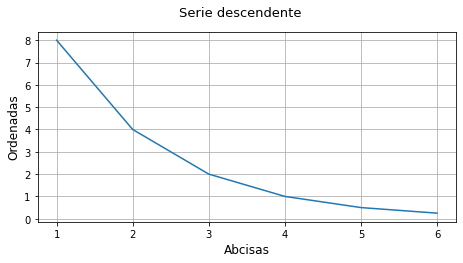

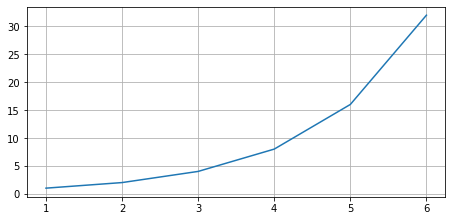

In [28]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

Lógicamente, hemos diseñado nuestro modelo para aplicarlo posteriormente a los datos que ya tenemos.
Concretamente, podemos aplicarlo también a la representación de los sueldos medios registrados en cada año.

[(2020, 179333.33), (2021, 147750.0), (2022, 175099.11)]


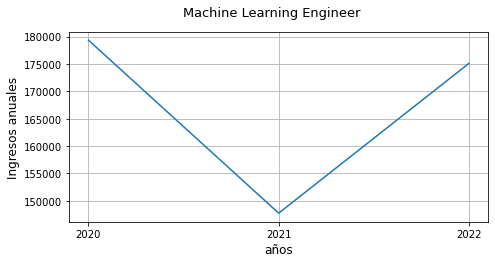

In [29]:
# Pruebas de funcionamiento:

annos = range(2020, 2023)
annos_sueldos = [(anno, average_salary_with_dict(Salarios, "Machine Learning Engineer", anno, "US")) for anno in list(annos)]

print(annos_sueldos)

representar_xxx_yyy(annos_sueldos, ["Machine Learning Engineer", "Ingresos anuales", "años"])

[(2020, 179333.33), (2021, 147750.0), (2022, 175099.11)]


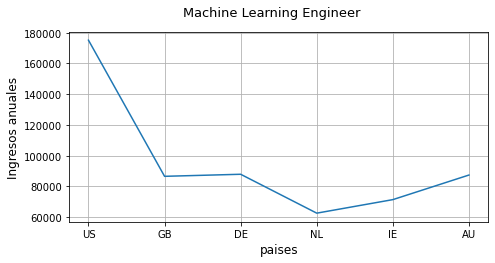

In [30]:
# Pruebas de funcionamiento:

paises = ["US", "GB", "DE", "NL", "IE", "AU"]
          
paises_sueldos = [(pais, average_salary_with_dict(Salarios, "Machine Learning Engineer", 2022, pais)) for pais in paises]

print(annos_sueldos)

representar_xxx_yyy(paises_sueldos, ["Machine Learning Engineer", "Ingresos anuales", "paises"])

### e.2 Histograma

Un gráfico más adecuado para este cometido es el histograma.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

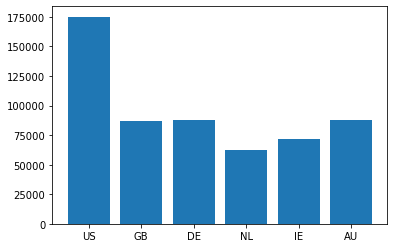

In [31]:
# Esta celda debe ser completada por el estudiante


**Nota.** Vemos que la curva se comporta de un modo extraño, pues sufre una caída en 2001: esto es lo que indican efectivamente los datos.

## d) Operaciones con dataframes [3 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

### d.1) Carga del dataframe

La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [32]:
# Esta celda debe ser completada por el estudiante


In [33]:
# Comprobación

tabla_completa = load_dataframe(DatosPunComas)

tabla_completa

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### d.2) Ajustes en nuestro archivo de datos

Deseamos ahora prescidir de la primera columna, pues únicamente da un número de orden de las filas, así como de las columnas relativas a la moneda local (`salary` y `salary currency`).

In [34]:
# Esta celda debe ser completada por el estudiante


In [35]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


Comprobamos también los tipos de datos de las columnas, para asegurarnos de que los datos numéricos se han cargado como tales; de lo contrario, deberíamos cambiar su tipo. 

In [36]:
# Comprobación

tabla_abreviada.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Aunque sólo sea a efectos didácticos, la columna de los porcentajes debería ser un real... Cambia esto, sólo para practicar.

In [37]:
# Esta celda debe ser completada por el estudiante


In [38]:
# Comprobación

tabla_abreviada.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary_in_usd           int64
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
dtype: object

In [39]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0.0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0.0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50.0,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0.0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50.0,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100.0,US,M
603,2022,SE,FT,Data Engineer,126000,US,100.0,US,M
604,2022,SE,FT,Data Analyst,129000,US,0.0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100.0,US,M


También, la columna de la experiencia será más manejable si convertimos los código en números (así: "EN" -> 0, "MI" -> 1, "EX" -> 2, "SE" -> 3) y algo parecido haremos con el tamaño de las compañías ("S" -> 1, "EX: 0, "M" -> 2, "L" -> 2).

In [40]:
# Esta celda debe ser completada por el estudiante


In [41]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,FT,Data Scientist,79833,DE,0.0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,JP,0.0,JP,1
2,2020,3,FT,Big Data Engineer,109024,GB,50.0,GB,2
3,2020,1,FT,Product Data Analyst,20000,HN,0.0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,US,50.0,US,3
...,...,...,...,...,...,...,...,...,...
602,2022,3,FT,Data Engineer,154000,US,100.0,US,2
603,2022,3,FT,Data Engineer,126000,US,100.0,US,2
604,2022,3,FT,Data Analyst,129000,US,0.0,US,2
605,2022,3,FT,Data Analyst,150000,US,100.0,US,2


In [42]:
# Esta celda debe ser completada por el estudiante


In [43]:
print(average_salary_with_dataframe(tabla_abreviada, "Data Scientist", 2020, "US"))

139067.25


Comprobamos que el resultado es el mismo que el que definimos usando el diccionario:

In [44]:
print(average_salary_with_dict(Salarios, "Data Scientist", 2020, "US"))

139067.25


## e) Un cálculo masivo con map-reduce [0.5 puntos]

En este apartado se ha de realizar un programa aparte que calcule, para cada país, el número de cada puesto de trabajo que tiene contratado, junto con el máximo sueldo de cada categoría pra dicho país con independencia de laño.

    C:\...> python puestos_trabajo.py -q ds_salaries.norm.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [45]:
# Hagamos una llamada al programa de consola desde aquí:

! python puestos_trabajo.py -q ds_salaries.norm.csv

["3D Computer Vision Researcher","IN"]	5409
["AI Scientist","AS"]	18053
["AI Scientist","DK"]	45896
["AI Scientist","ES"]	55000
["AI Scientist","US"]	200000
["Analytics Engineer","US"]	205300
["Applied Data Scientist","CA"]	54238
["Applied Data Scientist","GB"]	110037
["Applied Data Scientist","US"]	380000
["Applied Machine Learning Scientist","CZ"]	31875
["Applied Machine Learning Scientist","US"]	423000
["BI Data Analyst","KE"]	9272
["BI Data Analyst","US"]	150000
["Big Data Architect","CA"]	99703
["Big Data Engineer","CH"]	5882
["Big Data Engineer","GB"]	114047
["Big Data Engineer","IN"]	22611
["Big Data Engineer","MD"]	18000
["Big Data Engineer","RO"]	60000
["Big Data Engineer","US"]	70000
["Business Data Analyst","CA"]	70912
["Business Data Analyst","IN"]	18442
["Business Data Analyst","LU"]	59102
["Business Data Analyst","US"]	135000
["Cloud Data Engineer","SG"]	89294
["Cloud Data Engineer","US"]	160000
["Computer Vision Engineer","BR"]	24000
["Computer Vision Engineer","DK"]	286

In [46]:
# Para que el resultado se almacene en un archivo:

! python puestos_trabajo.py -q ds_salaries.norm.csv  > sueldos_maximos.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`. Observaciones:

- La instrucción siguiente está comentada para ocultar una solución mía.
  Tú debes suprimir el símbolo `#` del comentario
  para mostrar tu solución aquí.
- Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [47]:
# ! type puestos_trabajo.py

## e_bis) Un cálculo masivo con map-reduce [0.5 puntos]

<br>

<font color="blue">
Como la solución del apartado anterior se entregó por error mío, puedes, si lo deseas, inventar tú mismo un nuevo enunciado para ser resuelto con la técnica de *map-reduce*, y proponer luego una solución para el mismo.
</font>

## f) Un apartado libre [0.5 puntos]

<br>

<font color="green">
Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores, relacionado con el análisis de datos y con este proyecto. He aquí dos o tres ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, que encuentro un poco escaso:
  este apartado puede poner en juego algunas algunas operaciones que no hemos visto
  en esta librería.
  
- El acabado de las figuras es algo rudimentario.
  en cambio, la librería Plotly me permite permitirte trazar figuras más
  profesionales, y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce
  y representarlos gráficamente.
  
- La disponibilidad de datos de geolocalización puede permitirte alguna representación
  de la ubicación de los vehísulos registrados en su posición geográfica.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten. Hay muchas otras posibilidades: geopandas, web scraping, etc.

En la evaluación, si este apartado está bien o muy bien, anota un 0,3 o 0,4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.
</font>

<br>

### g.1) Enunciado

<br>

<font color="darkblue">
Completa tú este enunciado, y pon el color de la fuente en azul oscuro.
</font>

In [48]:
# Este apartado debe ser completado por el estudiante



In [49]:
# Pruebas de funcionamiento, también tarea del estudiante:



### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** ......................................
-   **Nombre:** ......................................
-   **Email:** ......................................
-   **Fecha:** ......................................

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="green">
Aquí vienen comentarios del estudiante. Lo siguiente es un ejemplo posible obviamente ... elimina este párrafo y redacta el tuyo propio, en azul.
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |0.0  / 2.0  |No lo he conseguido |
|c)  |0.0  / 2.0  |No he entendido el enunciado |
|d)  |0.25 / 1.5  |Sólo he conseguido una parte mínima |
|e)  |0.0  / 1.5  |No lo he conseguido |
|f)  |0.5  / 0.5  |No lo he conseguido más que mínimamente |
|g)  |0.0  / 0.5  |No he logrado el correcto funcionamiento |
|**Total** |**2.75** / 10.0|**Suspenso**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="green">
... comentarios del estudiante ...
Pon tú este párrafo con tus propias observaciones. Elimina este párrafo en verde.
</font>

<br>

<font color="black">
    
### Comentario adicional

</font>

<br>

<font color="green">
... Este apartado es optativo. Si lo completas, ponlo en azul; si no, suprímelo con su título.

<br>

In [50]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor

funciones = [to_semicolon, select_line, normalize_data, puesto_frec, anno_cargos_paises_comps_empls, load_salaries, \
             average_salary_with_dict, load_dataframe, average_salary_with_dataframe]

def sin_comentarios():
    sin_docstrings = [f.__name__ for f in funciones if f.__doc__ is None]
    return sin_docstrings

def pocos_comentarios():
    escasos_docstrings = [f.__name__ for f in funciones if f.__doc__ is not None and len(f.__doc__.split("\n")) <= 3]
    return escasos_docstrings

print("Sin docstring: ", sin_comentarios())
print("Docstring deficiente: ", pocos_comentarios())

Sin docstring:  ['load_salaries', 'average_salary_with_dict', 'average_salary_with_dataframe']
Docstring deficiente:  ['to_semicolon', 'select_line', 'normalize_data', 'puesto_frec', 'anno_cargos_paises_comps_empls', 'load_dataframe']


In [51]:
[name for name in dir() if  name[0].islower()]

['anno',
 'anno_cargos_paises_comps_empls',
 'annos',
 'annos_sueldos',
 'average_salary_with_dataframe',
 'average_salary_with_dict',
 'ax',
 'cabecera',
 'cargo',
 'defaultdict',
 'exit',
 'f',
 'fig',
 'funciones',
 'get_ipython',
 'linea',
 'linea_1',
 'load_dataframe',
 'load_salaries',
 'load_salaries_compact',
 'normalize_data',
 'pais',
 'paises',
 'paises_sueldos',
 'pd',
 'plt',
 'pocos_comentarios',
 'puesto',
 'puesto_frec',
 'puesto_y_frec',
 'quit',
 'representar_xxx_yyy',
 'select_line',
 'sin_comentarios',
 'sueldo_medio_agrupando',
 'sueldos',
 'tabla_abreviada',
 'tabla_completa',
 'to_semicolon']